In [1]:
import math, numpy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def v(x,t,n):
    Bn = (n*math.pi*math.cos(n*math.pi) - math.sin(n*math.pi))/((n*math.pi)**2)
    serie = math.sin(n*math.pi*x)*math.exp(-t*(n*math.pi)**2)
    return Bn*serie

In [3]:
L=np.linspace(0,1,11)
sol = np.zeros(11)
nx = 1
#print(L,sol,nx)

In [4]:
for xx in range(11):
    for nn in range(1,nx+1):
        sol[xx]+=v(L[xx],1.5,nn)
    sol[xx] *= 2
    sol[xx] += L[xx]
print(sol)

[0.         0.09999993 0.19999986 0.29999981 0.39999977 0.49999976
 0.59999977 0.69999981 0.79999986 0.89999993 1.        ]


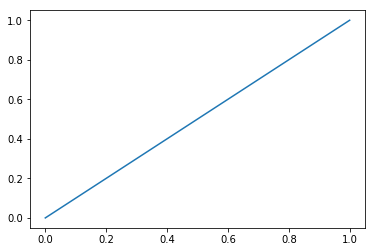

In [5]:
plt.plot(L,sol)